# Elecciones España 2016: ¿Cuántos votos obtuvo cada partido? 

En esta sección del trabajo analizamos los datos de las elecciones de 2016 para conocer los votos que obtuvo cada partido. 

Carga de datos: 
El Ministerio del Interior español nos proporciona una serie de datos para poder realizar este análisis.

In [436]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(style="whitegrid")

In [437]:
votos = pd.read_csv('08021606.csv', index_col=False )
votos.head()

,codigo_elecciones
0,022016061011190000490000076700000
1,022016061011490000280000033000000
2,022016061011490000940000070800000
3,022016061011890000810000076300000
4,022016061019990000680142625800023


## Formato Ministerio del Interior

Se realizó la siguiente función para obtener los datos del CSV y crear el formato marcado por el ministerio del interior. 

In [438]:
def get_cosas (x):
    foo = x['codigo_elecciones']
    tipo_eleccion = []
    ano_eleccion = []
    mes_eleccion = []
    num_vuelta = []
    codigo_comunidad = []
    codigo_ine = []
    codigo_distrito = []
    codigo_candidatura = []
    votos_obtenidos = []
    num_candidatos = []
    for i in range(len(foo)):
        tipo_eleccion.append(foo[i][:2])
        ano_eleccion.append(foo[i][2:6])
        mes_eleccion.append(foo[i][6:8])
        num_vuelta.append(foo[i][8:9])
        codigo_comunidad.append(foo[i][9:11])
        codigo_ine.append(foo[i][11:13])
        codigo_distrito.append(foo[i][13:14])
        codigo_candidatura.append(int(foo[i][14:20]))
        votos_obtenidos.append(int(foo[i][20:28]))
        num_candidatos.append(int(foo[i][28:33]))
    d = {'tipo_eleccion':tipo_eleccion,'ano_eleccion':ano_eleccion,'mes_eleccion':mes_eleccion,'num_vuelta':num_vuelta,
         'codigo_comunidad':codigo_comunidad,'codigo_ine':codigo_ine,'codigo_distrito':codigo_distrito, 
         'codigo_candidatura':codigo_candidatura, 'votos_obtenidos':votos_obtenidos,'num_candidatos': num_candidatos}
    datos_elecciones_2016 = pd.DataFrame(d)
    return datos_elecciones_2016

my_data = get_cosas(votos)
my_data

,tipo_eleccion,ano_eleccion,mes_eleccion,num_vuelta,codigo_comunidad,codigo_ine,codigo_distrito,codigo_candidatura,votos_obtenidos,num_candidatos
0,02,2016,06,1,01,11,9,49,767,0
1,02,2016,06,1,01,14,9,28,330,0
2,02,2016,06,1,01,14,9,94,708,0
3,02,2016,06,1,01,18,9,81,763,0
4,02,2016,06,1,01,99,9,68,1426258,23
...,...,...,...,...,...,...,...,...,...,...
822,02,2016,06,1,16,99,9,81,312,0
823,02,2016,06,1,17,03,9,93,1961,0
824,02,2016,06,1,17,12,9,94,711,0
825,02,2016,06,1,17,46,9,83,570,0


El código **99** representa los datos nacionales, decidimos basar nuestro análisis en este código y filtrarlo de esta forma.

In [439]:
my_data = my_data[(my_data['codigo_comunidad'] != '99')& (my_data['codigo_ine'] != '99')] 

Para tener una mejor visualización de los datos se agrego la sigla y denominación de los partidos de acuerdo al código de la candidatura. 

In [440]:
codigo_candidatura = pd.read_csv('codigo_candidatura.csv', index_col=False, encoding='UTF-8', 
                                 sep = ";", names = ['codigo_candidatura','siglas',
                                                     'denominación'
                                                     ,'codigo_nacional'], header=0)
codigo_candidatura

,codigo_candidatura,siglas,denominación,codigo_nacional
0,1,ALCD,ALIANZA DE CENTRO DEMOCRÁTICO,1
1,2,AND,PARTIDO SOMOS ANDALUCES POR ANDALUCÍA Y LOS PU...,2
2,5,BNG-NÓS,BNG-NÓS CANDIDATURA GALEGA,5
3,7,CCa-PNC,COALICIÓN CANARIA-PARTIDO NACIONALISTA CANARIO,7
4,8,CCD,CIUDADANOS DE CENTRO DEMOCRÁTICO,8
...,...,...,...,...
76,89,UNIDOS PODE,UNIDOS PODEMOS,59
77,91,UPL,UNIÓN DEL PUEBLO LEONÉS,91
78,92,UPN-PP,UNIÓN DEL PUEBLO NAVARRO EN COALICIÓN CON EL P...,68
79,93,UPyD,UNIÓN PROGRESO Y DEMOCRACIA,93


A continuación, realizamos la unión de todos los datos en una sola tabla.

In [446]:
merge_candidatura = my_data.merge(codigo_candidatura,on= 'codigo_candidatura')
merge_candidatura

,tipo_eleccion,ano_eleccion,mes_eleccion,num_vuelta,codigo_comunidad,codigo_ine,codigo_distrito,codigo_candidatura,votos_obtenidos,num_candidatos,siglas,denominación,codigo_nacional
0,02,2016,06,1,01,11,9,49,767,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,49
1,02,2016,06,1,06,39,9,49,468,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,49
2,02,2016,06,1,08,40,9,49,117,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,49
3,02,2016,06,1,01,18,9,49,641,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,49
4,02,2016,06,1,08,09,9,49,287,0,PCPE,PARTIDO COMUNISTA DE LOS PUEBLOS DE ESPAÑA,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,02,2016,06,1,05,35,9,78,119351,2,PSOE-NCa,PARTIDO SOCIALISTA OBRERO ESPAÑOL-NUEVA CANARIAS,77
541,02,2016,06,1,13,31,9,63,94972,2,PODEMOS-IU-,UNIDOS PODEMOS-ELKARREKIN AHAL DUGU,59
542,02,2016,06,1,02,22,9,24,377,0,ENTABAN,ENTABAN,24
543,02,2016,06,1,02,22,9,60,22430,1,PODEMOS-IU-,UNIDOS PODEMOS EN ALTO ARAGÓN,59


## Código Nacional 

Agrupamos por código nacional

In [447]:
test = merge_candidatura.groupby(['codigo_nacional'], as_index = False).sum()
test

,codigo_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
0,1,2,214,0
1,2,4,1727,0
2,5,20,45252,0
3,7,14,78253,1
4,8,16,6273,0
5,9,9,2672,0
6,10,40,483488,8
7,11,11,3011,0
8,12,12,830,0
9,13,681,3141570,32


Ordenamos de mayor a menor de acuerdo a la cantidad de votos obtenidos. 

In [448]:
datos_order = test.sort_values(by=['votos_obtenidos'], ascending=False).reset_index()
datos_order

,index,codigo_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
0,36,68,3572,7941236,137
1,38,77,3983,5443846,85
2,35,59,2496,3227123,45
3,9,13,681,3141570,32
4,12,22,88,853102,12
5,33,55,165,659771,9
6,15,25,100,632234,9
7,6,10,40,483488,8
8,34,56,224,347542,5
9,10,16,48,287014,5


## TOP 5 partidos con el mayor número de votos

In [449]:
grafica_top = df.sort_values(by=['votos_obtenidos'], ascending=False)
grafica_top = datos_order.head(5)
grafica_top

,index,codigo_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
0,36,68,3572,7941236,137
1,38,77,3983,5443846,85
2,35,59,2496,3227123,45
3,9,13,681,3141570,32
4,12,22,88,853102,12


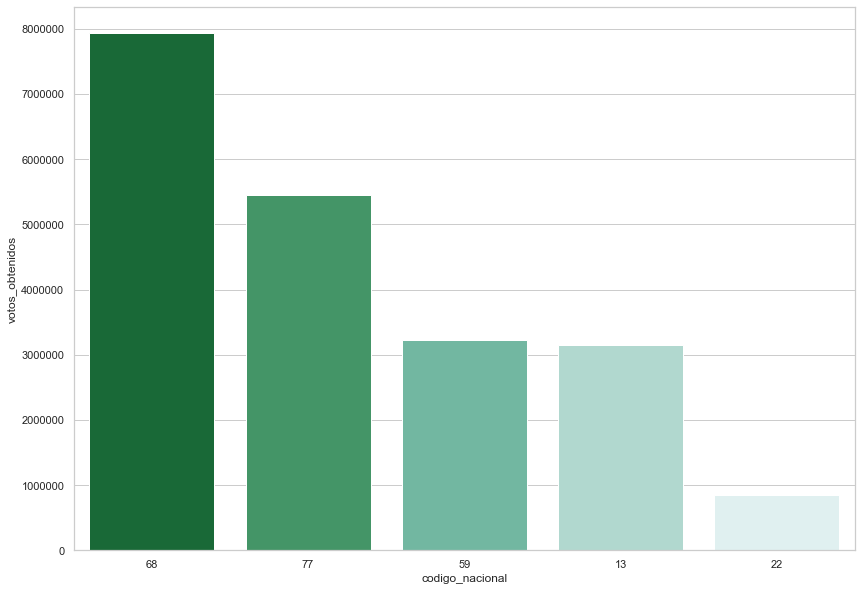

In [455]:
top = sns.barplot(x="codigo_nacional", y="votos_obtenidos", data=grafica_top, order=[68,77,59,13,22],
             palette="BuGn_r")

De acuerdo al analisis realizado podemos observar que el partido que más votos obtuvo en las elecciones de congreso en 2016 fue el partido **Partido Popular** obteniendo un total de 7.941.236 millones de votos a nivel nacional. 

El segundo partido en obtener la mayor cantidad de votos fue **Partido Socialista Obrero Español** con un total de **5.443.846** millones de votos a nivel nacional.

## Top 5 partidos con el menor número de votos

In [451]:
grafica_low = datos_order.tail(5)
grafica_low

,index,codigo_nacional,codigo_candidatura,votos_obtenidos,num_candidatos
46,16,27,27,254,0
47,0,1,2,214,0
48,18,29,29,200,0
49,20,31,31,80,0
50,46,87,87,48,0


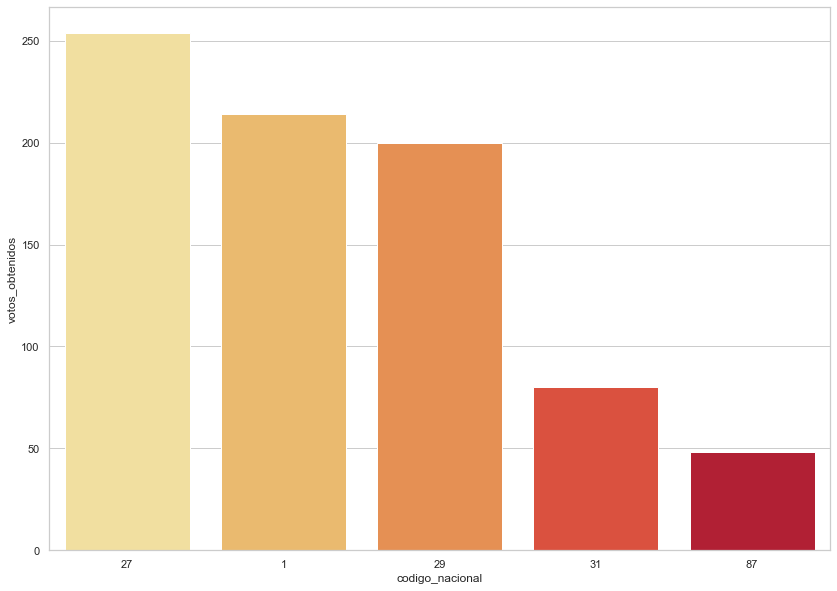

In [454]:
low = sns.barplot(x="codigo_nacional", y="votos_obtenidos", data=grafica_low, order=[27,1,29,31,87],
             palette="YlOrRd")

Por otro lado podemos observar que el partido que obtuvo la menor cantidad de votos en las elecciones de 2016 a nivel congreso fue **Unión de Todos** con un total de **48** votos.
